# Part 1

**Research Question:** 

Do vaccine-hesitant Americans respond to worsening COVID-19 outbreaks by getting vaccinated?

**Substantive Importance:** 

33% of eligible Americans remain unvaccinated as of 11/8/21. These holdouts cite various reasons for their hesitancy including side effects, distrust of government, and skepticism of the vaccines' safety & efficacy. We seek to learn more about what motivates their decision-making in the face of worsening conditions and heightened COVID risk. Part 1 establishes       

**Overall Approach & Methodology:** 

We analyze the correlation between growth rates in cumulative covid cases over time and the corresponding rate at which unvaccinated people receive jabs. We then split these observations on different variables of interest including political leaning and Social Vulnerability Index to select groups for further analysis in Part 2, which will examine whether hesitancy reasons change before and after an outbreak, indicating either A) a shift in attitudes among holdouts, or B) the specific hesitancy reasons that break down in the face of growing caseloads.    

## Background and Setup

We start by looking at case growth rates nationwide to select our time window of interest

In [1]:
from libraries import * # Import libraries from libraries.py
from import_data import * # Import data from import_data.py
from global_variables import * # Import global variables from global_variables.py
from plotting_functions import * # Import plotting functions from plotting_functions.py

# Read in output data from cleaning script. Set date to datetime dtype
df_joined_cases = pd.read_csv(os.getcwd().split('API-201Z')[0] + 'API-201Z/Data Sources/cleaned_joined_states.csv')
df_joined_cases['date'] = pd.to_datetime(df_joined_cases['date'])

# Cut out labor day when there was no data reported and 1w later which was anomaly
df_joined_cases = df_joined_cases.query('date != "2021-09-06" & date != "2021-09-13"')

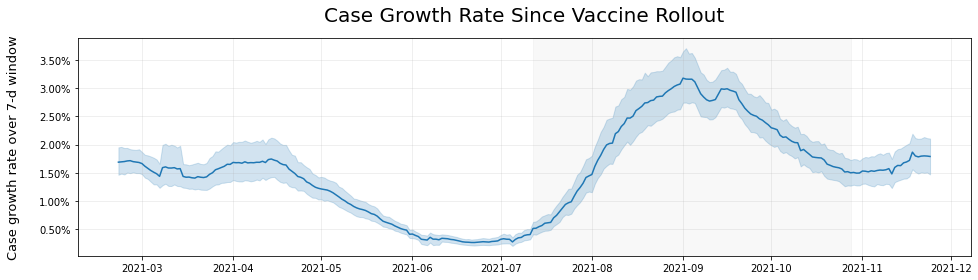

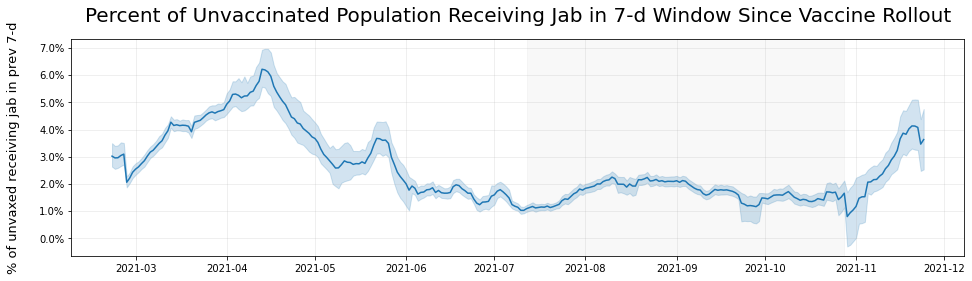

In [2]:
# Plot parameters
var_tuples = [
    ('WoW_%_cases', 'Case growth rate over 7-d window', 'Case Growth Rate Since Vaccine Rollout'), 
    ('WoW_%_vax', '% of unvaxed receiving jab in prev 7-d', 'Percent of Unvaccinated Population Receiving Jab in 7-d Window Since Vaccine Rollout')
    ]

# Loop through var_tuples and plot
for var in var_tuples:
    fig, ax = plt.subplots(figsize=(16,4))
    sns.lineplot(
        data=df_joined_cases.query('date > "2021-02-20"'),
        x='date',
        y=var[0]
    )
    ax.axvspan("2021-07-12", "2021-10-28", alpha=0.05, color='gray', zorder=0)
    ax.grid(True, which='both', axis='both', alpha=0.25)  
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.ylabel(var[1] + '\n', fontsize=13)
    plt.xlabel(None)
    plt.title(var[2], fontsize=20, y=1.05)

Based on the graphs above, we select July 12th through September 5th as the best timeframe to analyze our research question for the following reasons:

1. By July, virtually all remaining unvaccinated people can be considered 'vaccine-hesitant' given that they've had ample time to receive the vaccine after eligibility opened to all adults in all states, and after supply issues from earlier in the rollout have generally been resolved
2. Cases were increasing at a rapid rate nationwide during this time period (the 4th Wave). Although the 4th Wave continues past September 5th, we find there's a different relationship between case rate and vaccination rate when case growth rate is increasing vs decreasing. We analyze the downslope of the 4th Wave separately in the second half of this report
3. There are some anomalies in the data around the Fourth of July and Labor Day. We begin our window on the first day that excludes July 4th and the last day that doesn't include Labor Day

## First Half of 4th Wave (Cases Growth Rate Increasing: July 12 - Sept 5)

### Case Growth vs Vax Growth: Nationwide (First Half of 4th Wave)

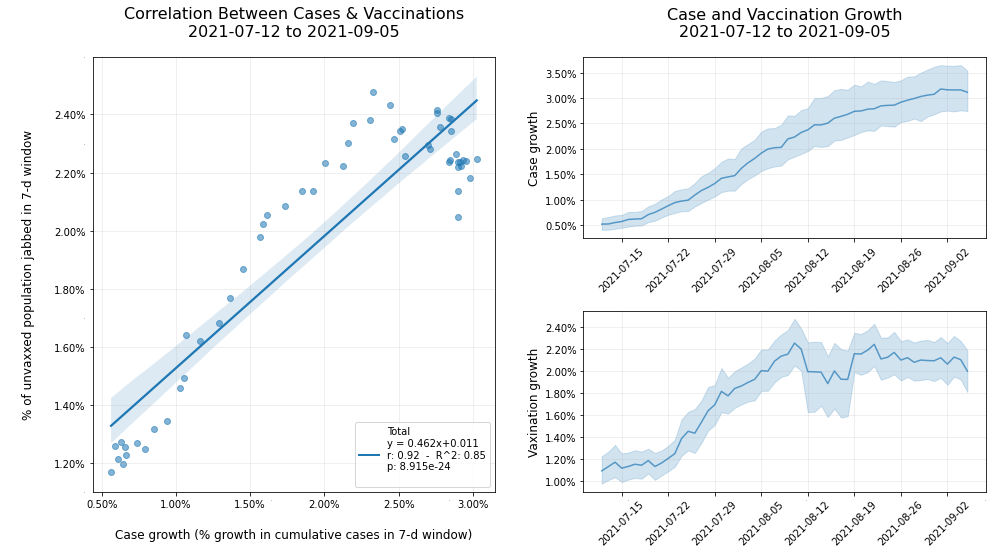

In [3]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-12", 
    end="2021-09-05"
) 

In [4]:
regression_table(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'gray'},
    start="2021-07-12", 
    end="2021-09-05"
)

### Case Growth vs Gax Growth by 2020 Election Winner at State Level (First Half of 4th Wave)

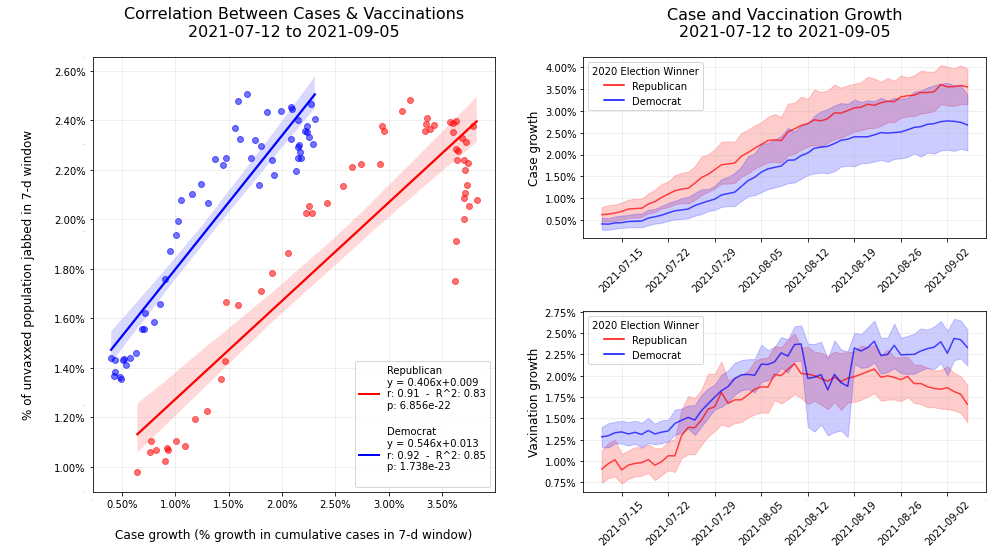

In [5]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-12", 
    end="2021-09-05"
) 

In [6]:
regression_table(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Democrat':'blue', 'Republican':'red'},
    start="2021-07-12", 
    end="2021-09-05"
) 

### Case Growth vs Gax Growth by Social Vulnerability at State Level (First Half of 4th Wave)

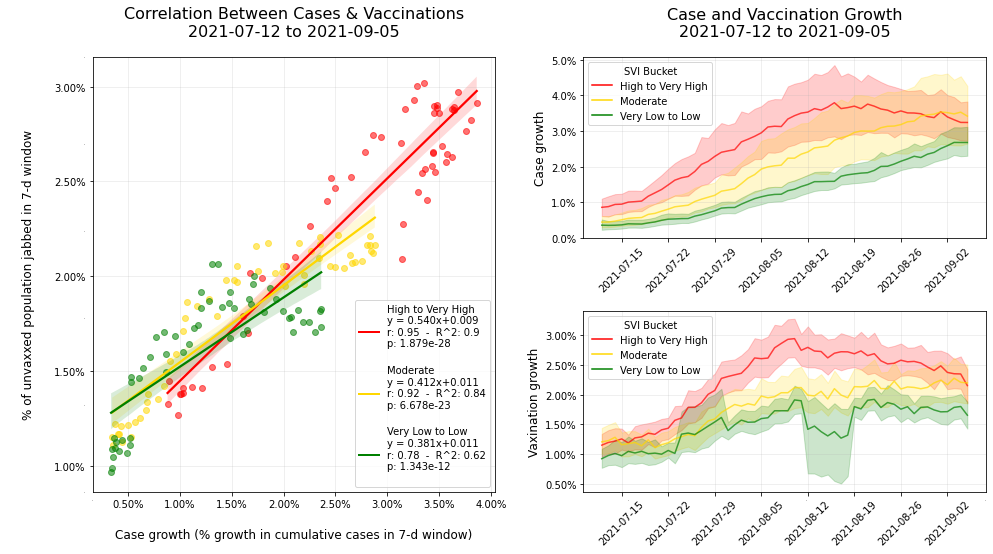

In [7]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-12", 
    end="2021-09-05"
) 

In [8]:
regression_table(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-12", 
    end="2021-09-05"
) 

### Regressions for all States (First Half of 4th Wave)

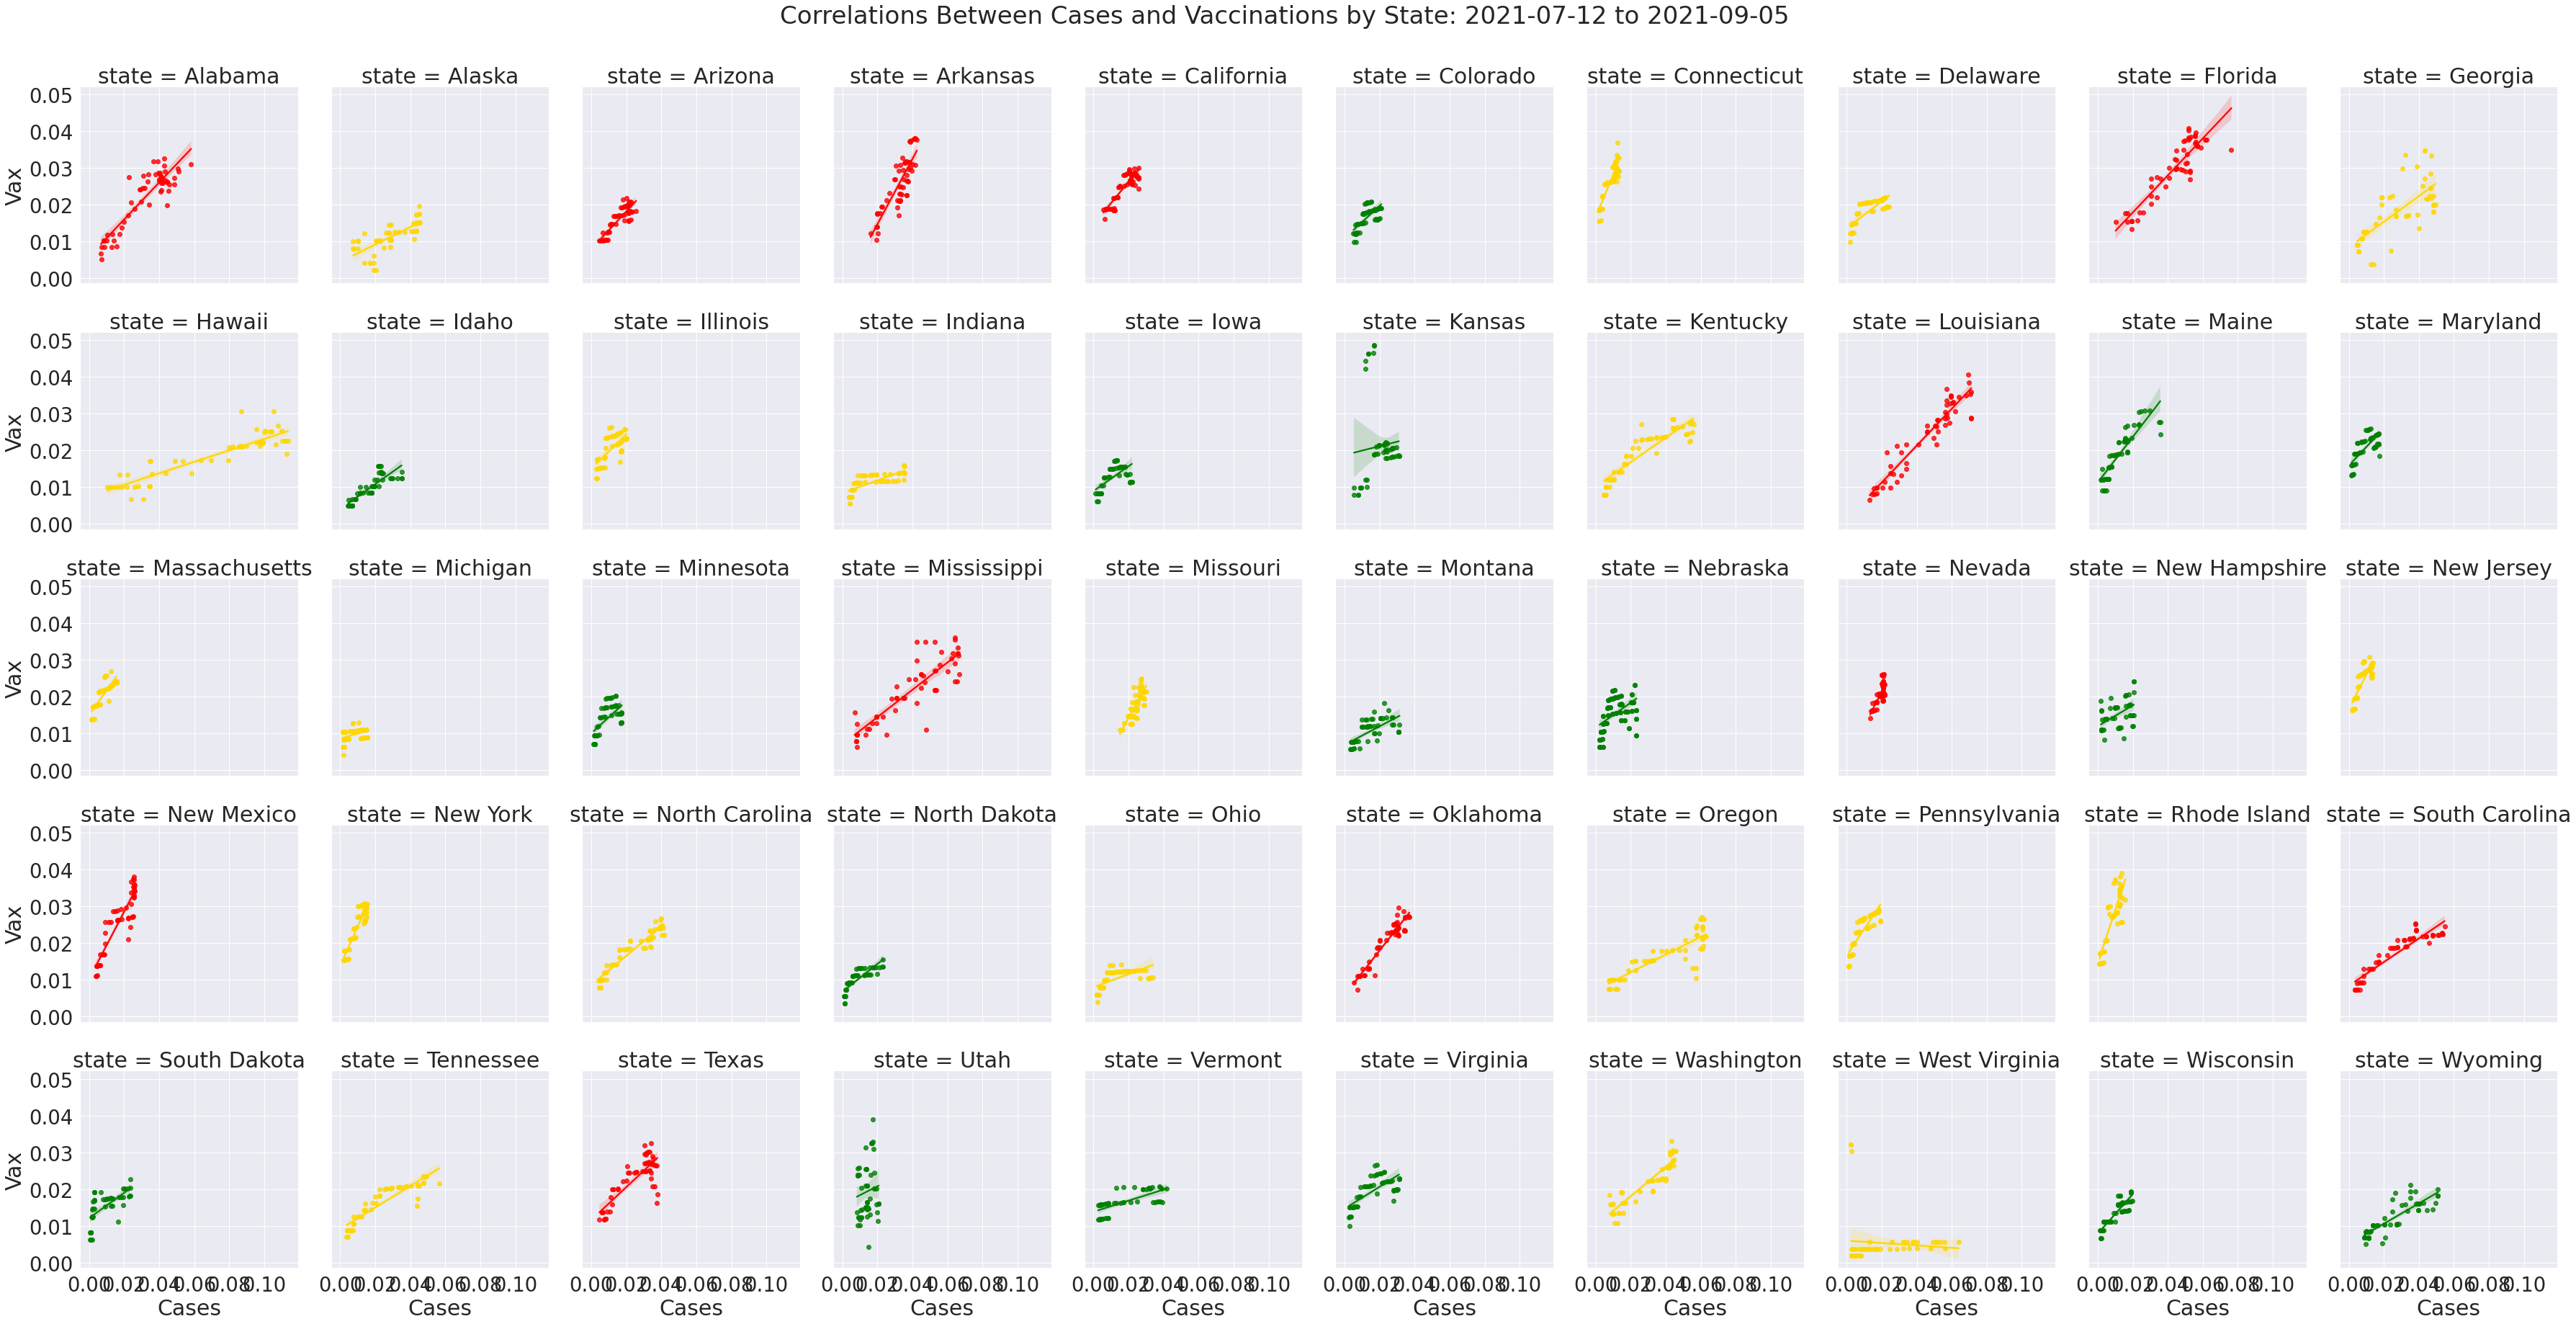

In [9]:
sns.set(font_scale=2.5)
g = sns.lmplot(
        data=df_joined_cases.query('"2021-07-12" <= date <= "2021-09-05" & `WoW_%_vax` >= 0 & state != "District of Columbia"'),
        x='WoW_%_cases',
        y='WoW_%_vax',
        col='state',
        col_wrap=10,
        sharey=True,
        sharex=True,
        hue='SVI Bucket',
        hue_order=['High to Very High', 'Moderate', 'Very Low to Low'],
        palette=['red','gold','green'],
        legend=False
    )
g.set_axis_labels('Cases', 'Vax')
plt.suptitle("Correlations Between Cases and Vaccinations by State: 2021-07-12 to 2021-09-05", fontsize=34, y=1.03)
sns.reset_orig()

### Regression Table for all States (First Half of 4th Wave)

In [10]:
# Create a dataframe of regression results for all states
linreg_results = []
time_window = ("2021-07-12", "2021-09-05")
for state in list(df_joined_cases['state'].unique()):        
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_cases'],
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_vax']
        )    
    linreg_results.append(
        (
        state, 
        round(slope, 3), 
        round(intercept, 3), 
        round(r_value, 3), 
        round(r_value ** 2, 3), 
        '{:0.3e}'.format(p_value)
        )
    )

linreg_by_state = pd.DataFrame(
    linreg_results,
    columns=['state','slope','intercept','r','r_squared','p_value']
).merge(pd.DataFrame(df_joined_cases.groupby('state')['SVI Bucket','2020 Election Winner'].max().reset_index()), on='state')

linreg_by_state.sort_values(['r','slope'], ascending=[False, False])


,state,slope,intercept,r,r_squared,p_value,SVI Bucket,2020 Election Winner
36,Oklahoma,0.612,0.006,0.950,0.903,1.591e-28,High to Very High,Republican
18,Louisiana,0.497,0.002,0.948,0.899,4.956e-28,High to Very High,Republican
33,North Carolina,0.401,0.008,0.947,0.896,1.060e-27,Moderate,Republican
40,South Carolina,0.326,0.008,0.929,0.862,1.743e-24,High to Very High,Republican
32,New York,1.069,0.014,0.927,0.859,3.134e-24,Moderate,Democrat
47,Washington,0.399,0.010,0.921,0.849,2.166e-23,Moderate,Democrat
11,Hawaii,0.154,0.008,0.921,0.849,2.148e-23,Moderate,Democrat
31,New Mexico,0.917,0.010,0.919,0.845,3.904e-23,High to Very High,Democrat
6,Connecticut,1.166,0.016,0.916,0.840,9.951e-23,Moderate,Democrat
0,Alabama,0.513,0.006,0.906,0.821,1.866e-21,High to Very High,Republican


## Full 4th Wave Including Downswing (July 12 - Oct 21)

### Case Growth vs Gax Growth: Nationwide (Full 4th Wave)

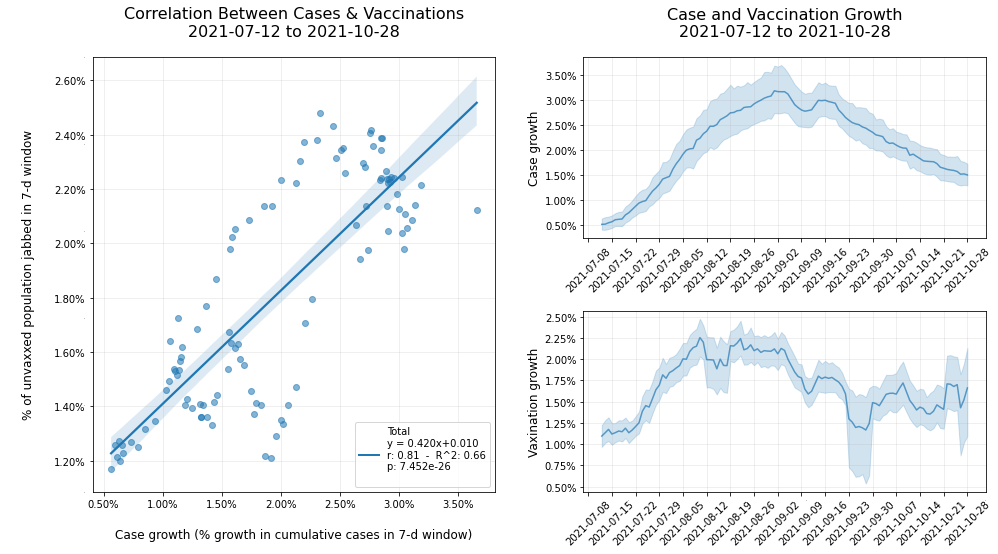

In [11]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-12", 
    end="2021-10-28"
) 

In [12]:
regression_table(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-12", 
    end="2021-10-28"
) 

### Case Growth vs Gax Growth by 2020 Election Winner at State Level (Full 4th Wave)

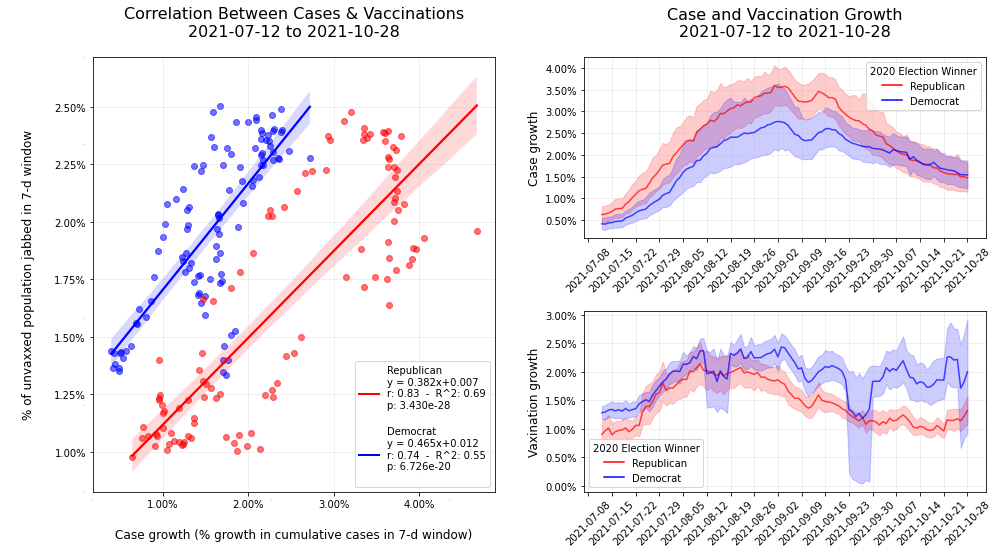

In [13]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-12", 
    end="2021-10-28"
) 

In [14]:
regression_table(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-12", 
    end="2021-10-28"
) 

### Case Growth vs Gax Growth by Social Vulnerability at State Level (Full 4th Wave)

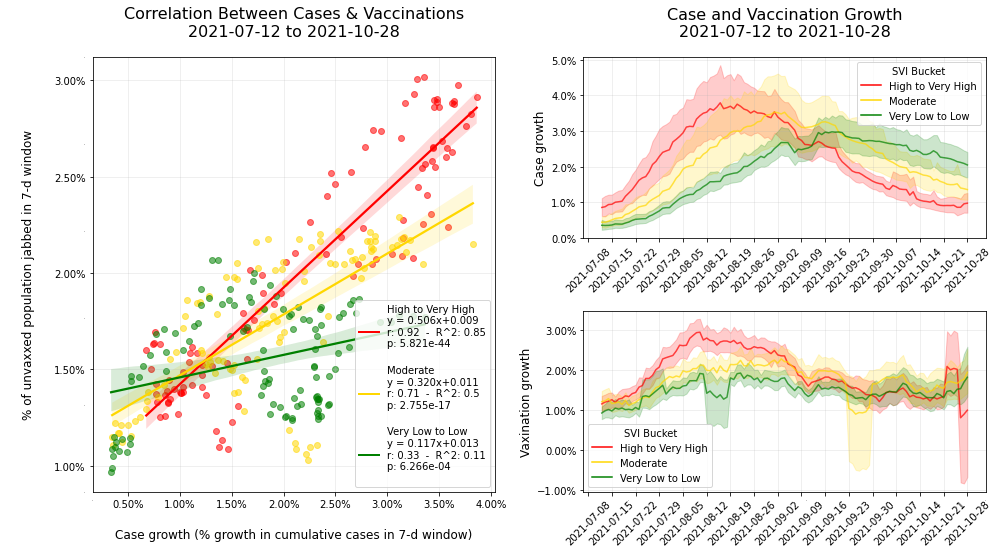

In [15]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-12", 
    end="2021-10-28"
) 

In [16]:
regression_table(
    data=df_joined_cases, 
    groupby='SVI Bucket',  
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-12", 
    end="2021-10-28"
) 

### Regressions for all States (Full 4th Wave)

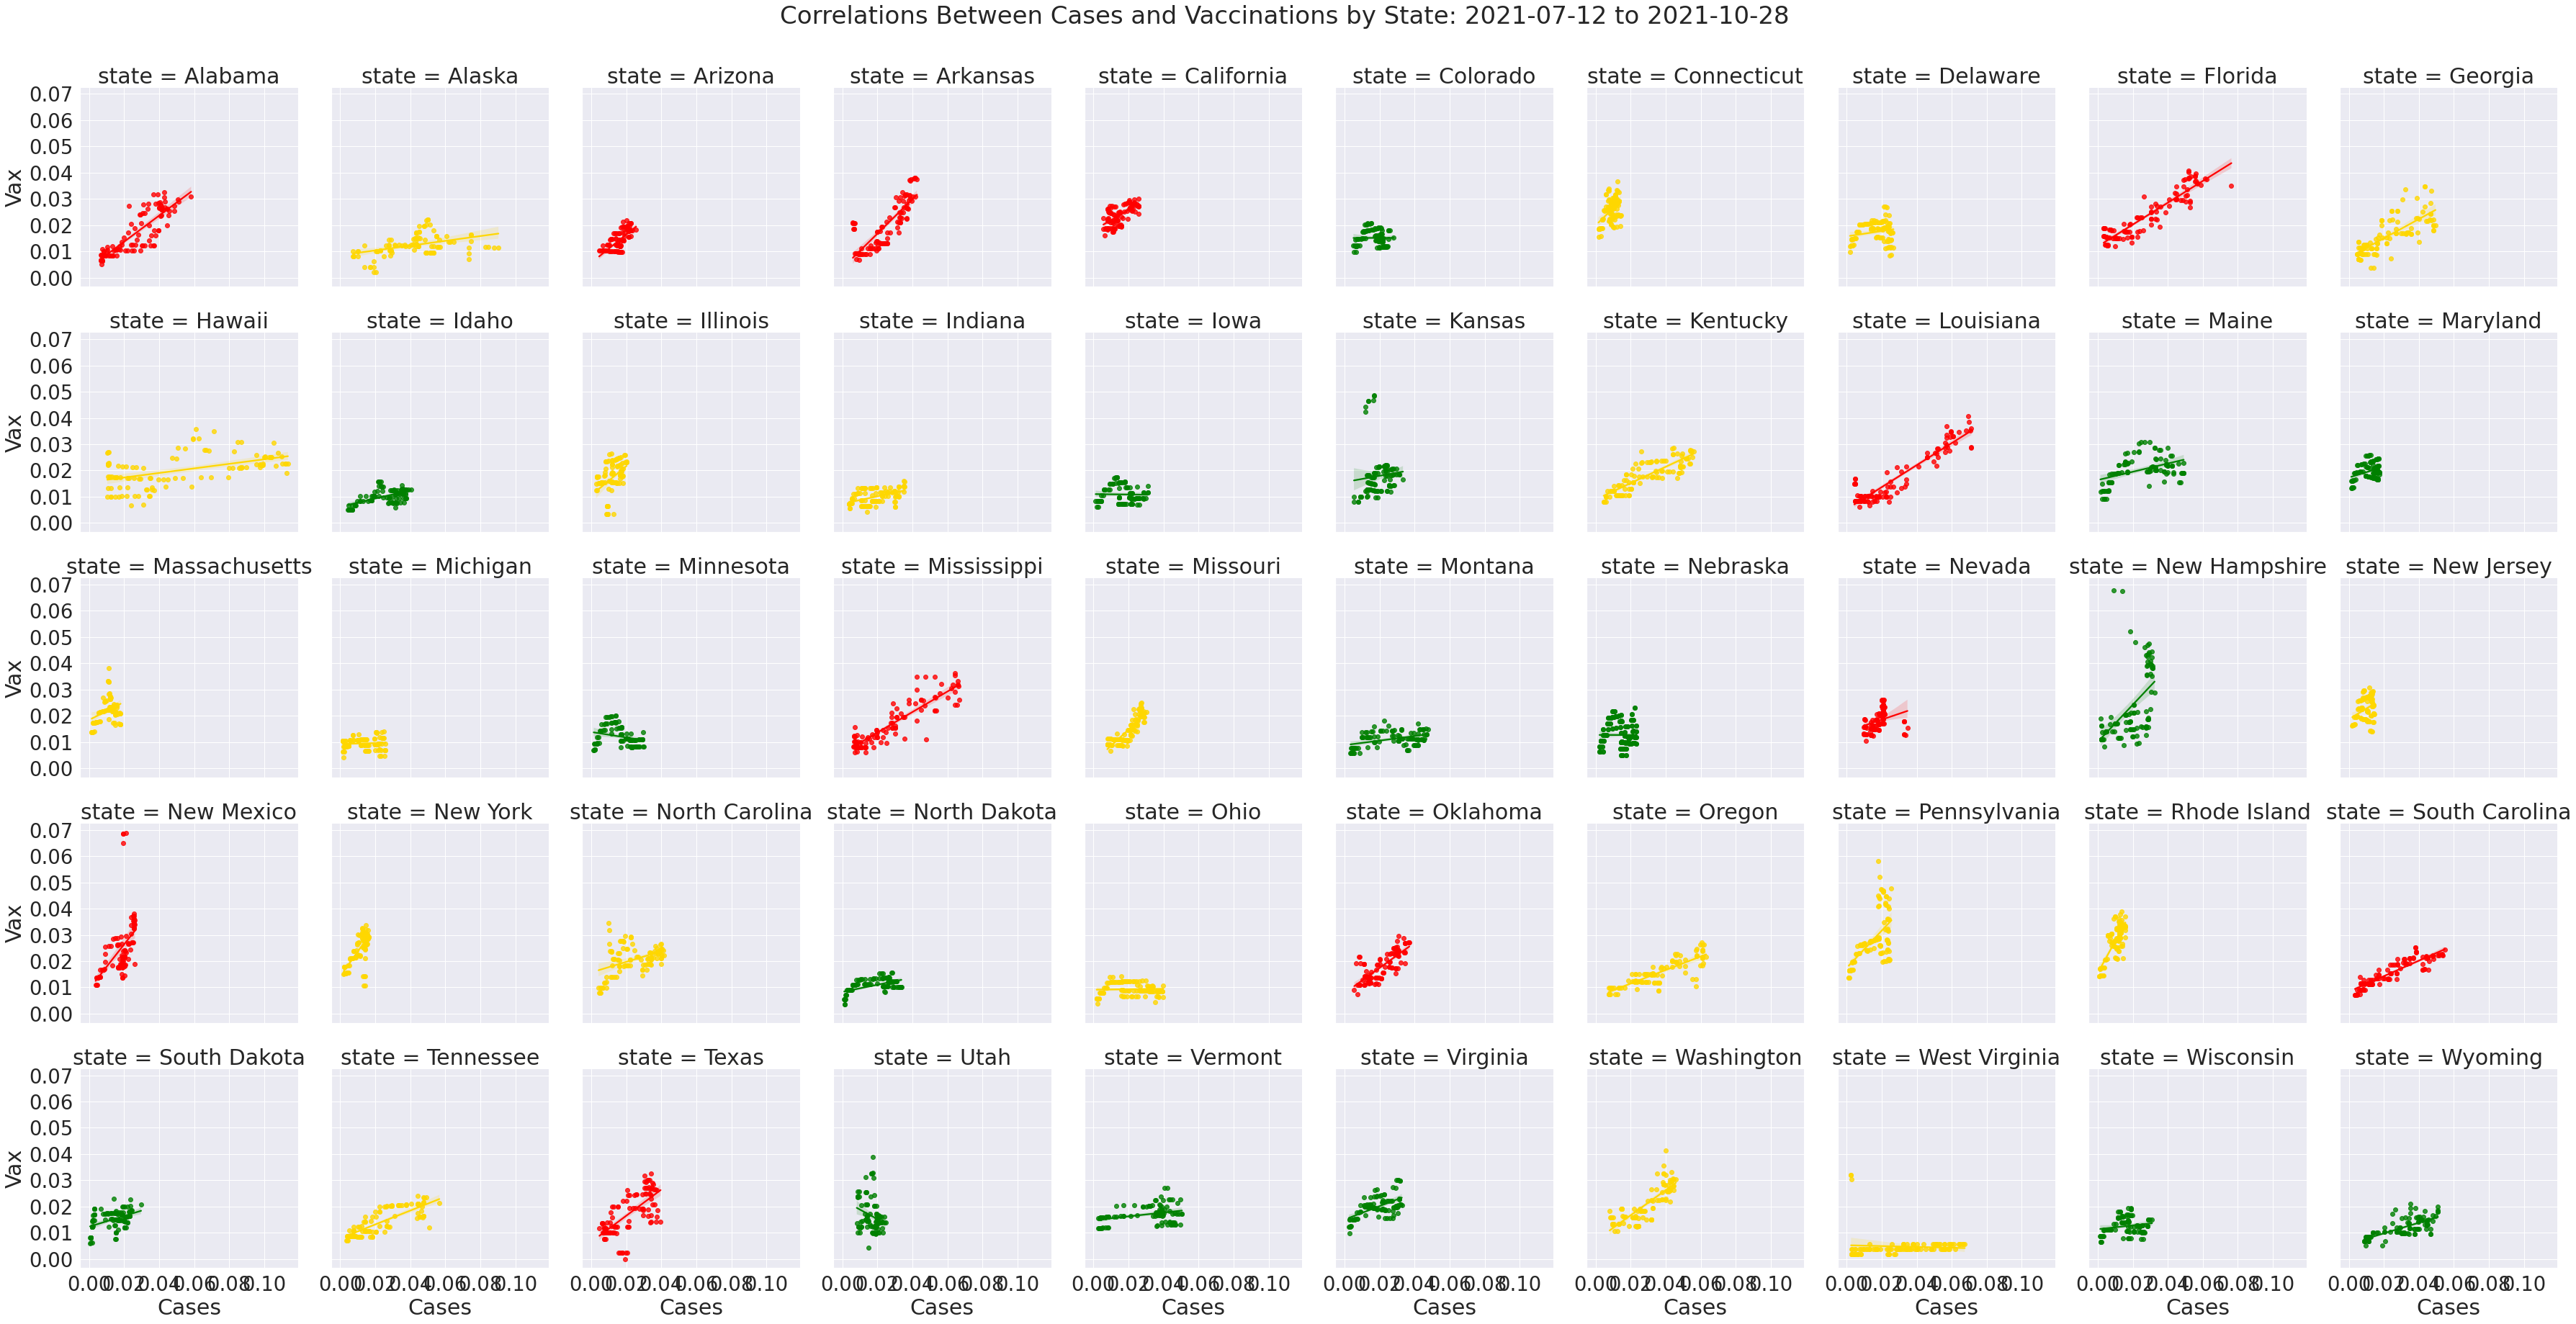

In [17]:
sns.set(font_scale=2.5)
g = sns.lmplot(
        data=df_joined_cases.query('"2021-07-12" <= date <= "2021-10-28" & `WoW_%_vax` >= 0 & state != "District of Columbia"'),
        x='WoW_%_cases',
        y='WoW_%_vax',
        col='state',
        col_wrap=10,
        sharey=True,
        sharex=True,
        hue='SVI Bucket',
        hue_order=['High to Very High', 'Moderate', 'Very Low to Low'],
        palette=['red','gold','green'],
        legend=False
    )
g.set_axis_labels('Cases', 'Vax')
plt.suptitle("Correlations Between Cases and Vaccinations by State: 2021-07-12 to 2021-10-28", fontsize=34, y=1.03)
sns.reset_orig()

### Regression Table for All States (Full 4th Wave)

In [18]:
# Create a dataframe of regression results for all states
linreg_results = []
time_window = ("2021-07-12", "2021-10-28")
for state in list(df_joined_cases['state'].unique()):        
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_cases'],
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_vax']
        )    
    linreg_results.append(
        (
        state, 
        round(slope, 3), 
        round(intercept, 3), 
        round(r_value, 3), 
        round(r_value ** 2, 3), 
        '{:0.3e}'.format(p_value)
        )
    )

linreg_by_state = pd.DataFrame(
    linreg_results,
    columns=['state','slope','intercept','r','r_squared','p_value']
).merge(pd.DataFrame(df_joined_cases.groupby('state')['SVI Bucket','2020 Election Winner'].max().reset_index()), on='state')

linreg_by_state.sort_values(['r','slope'], ascending=[False, False])



,state,slope,intercept,r,r_squared,p_value,SVI Bucket,2020 Election Winner
18,Louisiana,0.424,0.005,0.935,0.874,1.272e-48,High to Very High,Republican
9,Florida,0.419,0.012,0.925,0.856,1.293e-45,High to Very High,Republican
40,South Carolina,0.298,0.008,0.912,0.831,5.655e-42,High to Very High,Republican
24,Mississippi,0.391,0.006,0.899,0.808,5.152e-39,High to Very High,Republican
0,Alabama,0.497,0.004,0.861,0.741,2.641e-32,High to Very High,Republican
3,Arkansas,0.674,0.003,0.850,0.722,1.168e-30,High to Very High,Republican
17,Kentucky,0.310,0.009,0.849,0.721,1.465e-30,Moderate,Republican
25,Missouri,0.618,0.002,0.838,0.703,3.824e-29,Moderate,Republican
37,Oregon,0.258,0.006,0.837,0.701,5.260e-29,Moderate,Democrat
36,Oklahoma,0.497,0.007,0.807,0.651,1.569e-25,High to Very High,Republican
